# Imports


In [3]:
import pandas as pd
#from MineDeep.crawler.helpers.myHelper import choosefile
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import myHelper

#Load data

## Load user profile data from profile page

In [5]:
user_data = pd.read_csv(myHelper.choosefile(), header=0, sep='\t', encoding='utf16', engine='python')
user_data.head(20)

,id,create_at,days,favourites_count,followers_count,friends_count,lang,location,status_count
0,951179225570127872,2018-01-10 19:49:34,0,0,2,99,en,NaN,0
1,951179609495822336,2018-01-10 19:51:05,0,0,0,99,en,NaN,0
2,950831628221407233,2018-01-09 20:48:20,1,0,0,5,en,NaN,3
3,3028758389,2015-02-10 20:44:20,1065,1559,309,1364,en,NaN,1640
4,247281952,2011-02-04 13:39:12,2532,948,90,519,en,"London, UK",263
5,951175536067391488,2018-01-10 19:34:54,0,0,0,92,en,Ajlun,1
6,951172926434365440,2018-01-10 19:24:32,0,0,1,140,ar,NaN,0
7,951171729086296064,2018-01-10 19:19:46,0,4,0,44,ar,غزة,1
8,951171308234133505,2018-01-10 19:18:06,0,0,3,52,ar,NaN,0
9,3242270254,2015-05-08 18:27:19,978,31,3,66,en,NaN,26


In [6]:
user_data.lang.describe()

count     89836
unique       57
top          en
freq      66181
Name: lang, dtype: object

In [28]:
user_data.location.describe()

count      50761
unique     21047
top       London
freq         917
Name: location, dtype: object

In [29]:
# Add users average tweets number since their user creation  
warnings.filterwarnings("ignore")

user_data['status_avg'] = user_data.status_count/user_data.days
user_data.status_avg[user_data.status_avg == np.inf] = user_data.status_count
user_data.status_avg.replace(np.NaN, 0, inplace=True) 
user_data[['id', 'status_avg']].sort_values("status_avg", ascending=False).head(20)

,id,status_avg
51708,3265559538,1301.905742
86723,369760961,843.614156
51197,2359028480,836.656073
42651,701759133654061057,816.995640
12203,935892168199278592,703.238095
22657,826891982559641604,669.664723
39856,721992744210550784,642.115506
16937,877989051214827520,568.806931
42720,4855230641,505.347826
43512,3064247597,472.359733


## Load user data between 04/10/17 - 04/01/18

In [8]:
mined_data = pd.read_csv(myHelper.choosefile(), header=0, sep='\t', encoding='utf16', engine='python')
mined_data.days = 99
mined_data.tweets_avg = mined_data.tweets/mined_data.days
mined_data.head(20)

,id,tweets,days,retweets_precent,replies_precent,tweets_avg
0,951179609495822336,0,99,0.000000,0.000000,0.000000
1,247281952,17,99,0.823529,0.117647,0.171717
2,3242270254,26,99,0.269231,0.538462,0.262626
3,951168779177906177,0,99,0.000000,0.000000,0.000000
4,19778019,24,99,0.041667,0.750000,0.242424
5,951167398996074497,0,99,0.000000,0.000000,0.000000
6,951164889120301056,0,99,0.000000,0.000000,0.000000
7,951164610849181697,8,99,0.000000,0.375000,0.080808
8,3410852319,88,99,0.681818,0.056818,0.888889
9,951160926992060417,0,99,0.000000,0.000000,0.000000


## Merge the two datasets 
We distinguish the user average tweeting count per day to the three months period and since created period.

Variables explaination:
status_avg - since created.
tweets_avg - three months period. 

In [30]:
joined = pd.merge(user_data, mined_data, on='id')

joined.iloc[:, 3:].describe()


,favourites_count,followers_count,friends_count,status_count,status_avg,tweets,days_y,retweets_precent,replies_precent,tweets_avg
count,80881.000000,8.088100e+04,8.088100e+04,8.088100e+04,80881.000000,80881.000000,80881.0,80881.000000,80881.000000,80881.000000
mean,3257.386061,1.921549e+03,1.248209e+03,6.459617e+03,3.779886,279.708201,99.0,0.295510,0.112286,2.825335
std,13269.616849,4.041717e+04,2.318010e+04,2.548192e+04,15.643292,690.620550,0.0,0.359321,0.215525,6.975965
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,99.0,0.000000,0.000000,0.000000
25%,6.000000,1.500000e+01,1.170000e+02,2.100000e+01,0.029909,0.000000,99.0,0.000000,0.000000,0.000000
50%,140.000000,1.020000e+02,3.520000e+02,4.600000e+02,0.358491,6.000000,99.0,0.038462,0.000000,0.060606
75%,1391.000000,4.150000e+02,9.810000e+02,3.528000e+03,2.153846,144.000000,99.0,0.605882,0.124294,1.454545
max,451816.000000,4.662274e+06,4.003481e+06,1.954654e+06,1301.905742,3250.000000,99.0,1.000000,1.000000,32.828283


We can notice not a sagnificant difference between these two user daily tweeting average means. Further more, their standard deviations are quite high comparing their means. This may occures as a result of the many outliers (with very high values) users tweeting behavior appearing in this population. 




### Compare behavior distribution - Box plot
Lets use a box plot for better understanding users behavior and periods difference behavior.

Text(0.5,1,'A better resolution of the users behavior')

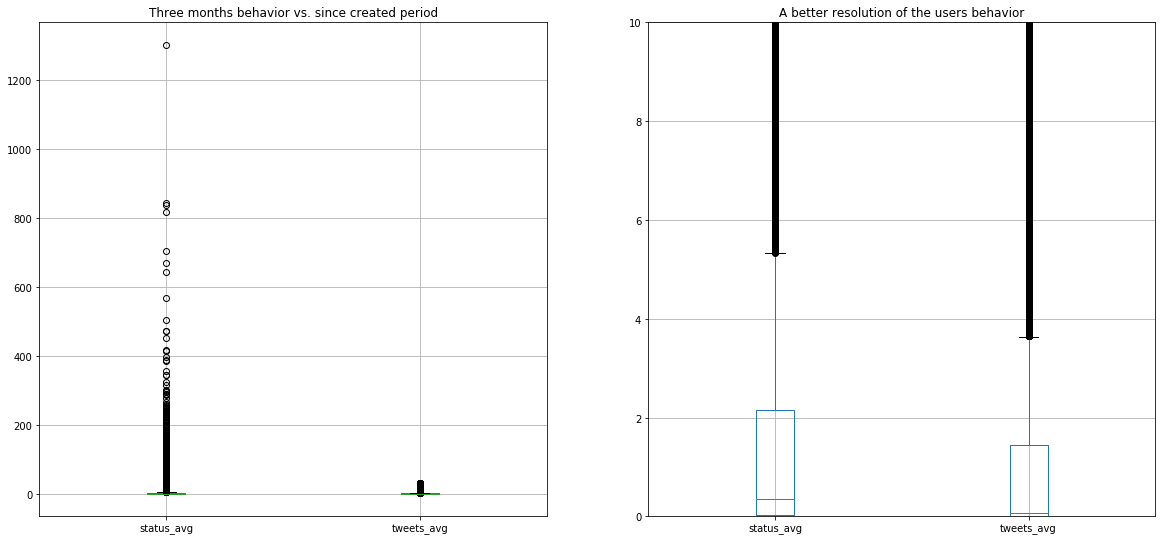

In [32]:
plt.figure(figsize=(20, 20))
# User daily tweets averages box plot
plt.subplot(221)
joined[['status_avg', 'tweets_avg']].boxplot(figsize=(20, 10))
plt.title('Three months behavior vs. since created period')
# A better box plot resolution 
plt.subplot(222)
joined[['status_avg', 'tweets_avg']].boxplot(figsize=(20, 10))
plt.ylim(0, 10)
plt.title('A better resolution of the users behavior')


### Finding a relationship - scatter plot
Maybe we could find any correlation between the behaviors. As the scatter plot show we cannot determine any correlation or some kind of a connection between them.

Text(0,0.5,'Tweets user daily average (3 months period)')

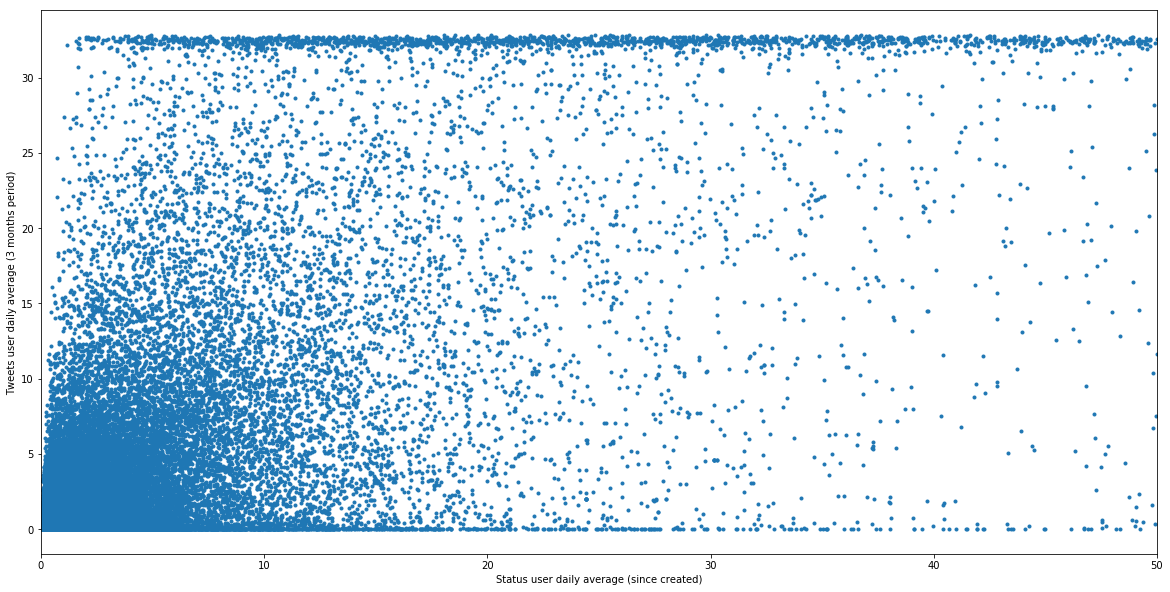

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(joined.status_avg, joined.tweets_avg, marker='.')
plt.xlim(0, 50)
plt.xlabel('Status user daily average (since created)')
plt.ylabel('Tweets user daily average (3 months period)')

###Correlation using pearson coeficient
The pearson coeficient confirms us the scatter plot conclusion that there is some correlation between the two periods behavior, but not a significant correlation.

In [34]:
stats.pearsonr(joined.status_avg, joined.tweets_avg)

(0.52070327001568273, 0.0)

In [35]:
small = joined[(joined.status_avg < 35)]
stats.pearsonr(small.status_avg, small.tweets_avg)

(0.70323265216166153, 0.0)

### Compare populations ditribution - Histogram
We can observe the two populutions and determine some similarity between them.  


Text(0.5,1,'User data of three months')

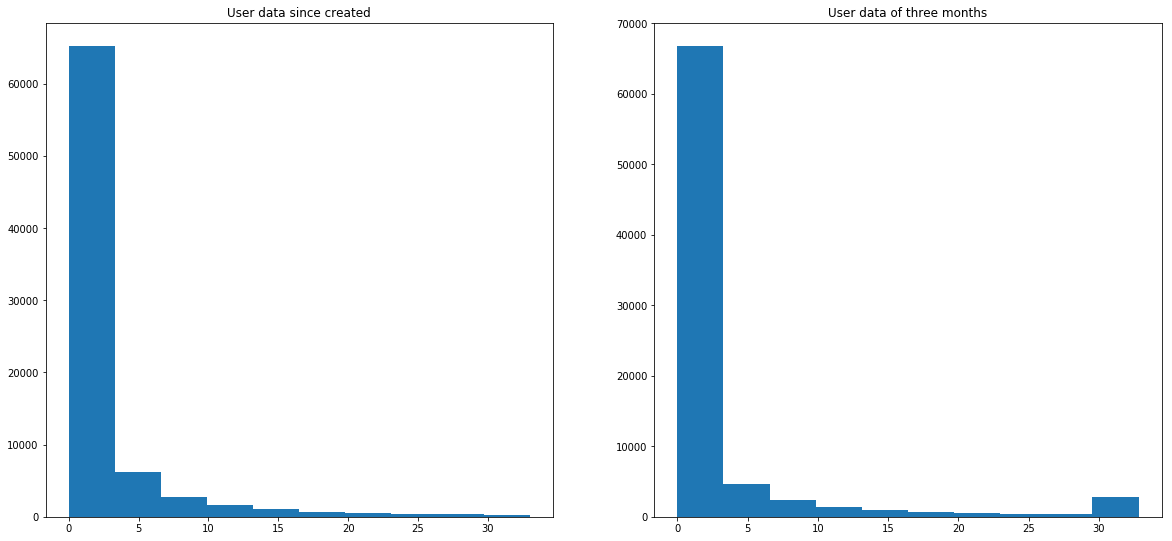

In [36]:
plt.figure(figsize=(20, 20))
# Since created histogram
plt.subplot(221)
plt.hist(joined.status_avg, range=(0, 33))
plt.title('User data since created')
# Three months histogram
plt.subplot(222)
plt.hist(joined.tweets_avg)
plt.title('User data of three months')

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(joined.status_avg.reshape(-1, 1))

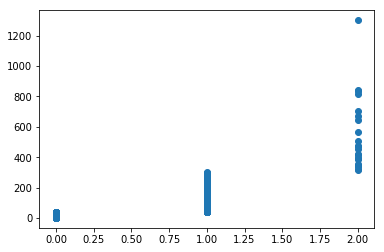

In [32]:
kmeans.labels_
plt.scatter(kmeans.labels_, joined.status_avg)
df_clusters = pd.DataFrame({'tweets_avg': joined.status_avg, 'cluster': kmeans.labels_})

In [33]:
df_clusters.cluster = pd.Categorical(df_clusters.cluster)

In [34]:
df_clusters.cluster.value_counts()

0    79380
1     1479
2       22
Name: cluster, dtype: int64

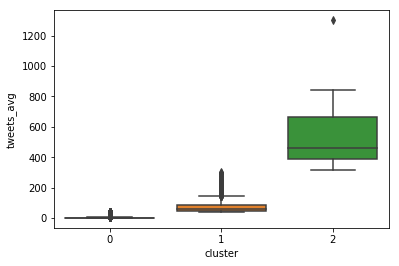

In [35]:
sns.boxplot(x=df_clusters.cluster, y=df_clusters.tweets_avg)

### Active users (without ouliers)
The active users description show us a different behavior and a more realistic one. The Median is a good approximation of the average active user behavior.

In [38]:
active_users = joined[((joined.status_avg > 0) & (joined.tweets_avg > 0) & (joined.status_avg < 35))]
active_users[['status_avg', 'tweets_avg']].describe()


,status_avg,tweets_avg
count,48571.000000,48571.000000
mean,3.308220,3.762786
std,5.581287,7.149528
min,0.000320,0.010101
25%,0.235721,0.101010
50%,1.016565,0.676768
75%,3.588062,3.494949
max,34.993684,32.818182


Text(0,0.5,'tweeting daily average')

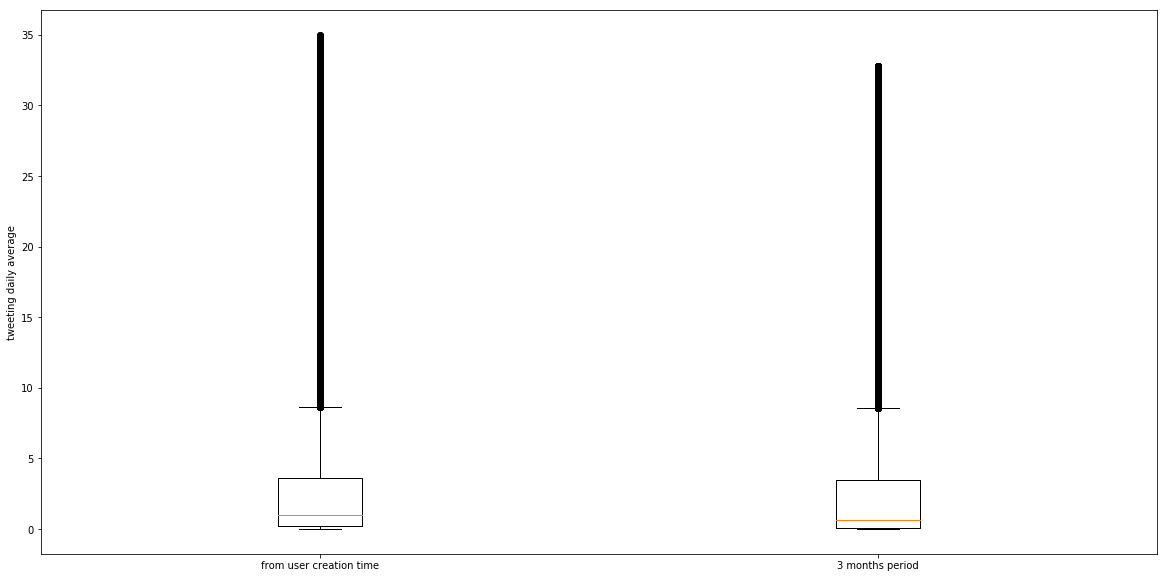

In [57]:
fig = plt.figure(figsize=(20, 10))
bp = plt.boxplot([active_users.status_avg, active_users.tweets_avg], labels=['from user creation time', '3 months period'])
plt.ylabel('tweeting daily average')

In [40]:
# get the whiskers boarder
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
max(whiskers[1])

8.615384615384615

In [41]:
# new
prct = joined.tweets_avg[joined.tweets_avg > 8.61].count()/len(joined)
print('The high active users are {} of the whole population'.format(prct))

The high active users are 0.09790927411876708 of the whole population


##Users segmentation thresholds

* need to change

Anemic user - [ < 1.27]

Active user - [1.27 - 7.564]

Advanced active users - [7.564 > ] 

##Retweets

In [42]:
active_users.retweets_precent.describe()

count    48571.000000
mean         0.470467
std          0.349684
min          0.000000
25%          0.123762
50%          0.484536
75%          0.787948
max          1.000000
Name: retweets_precent, dtype: float64

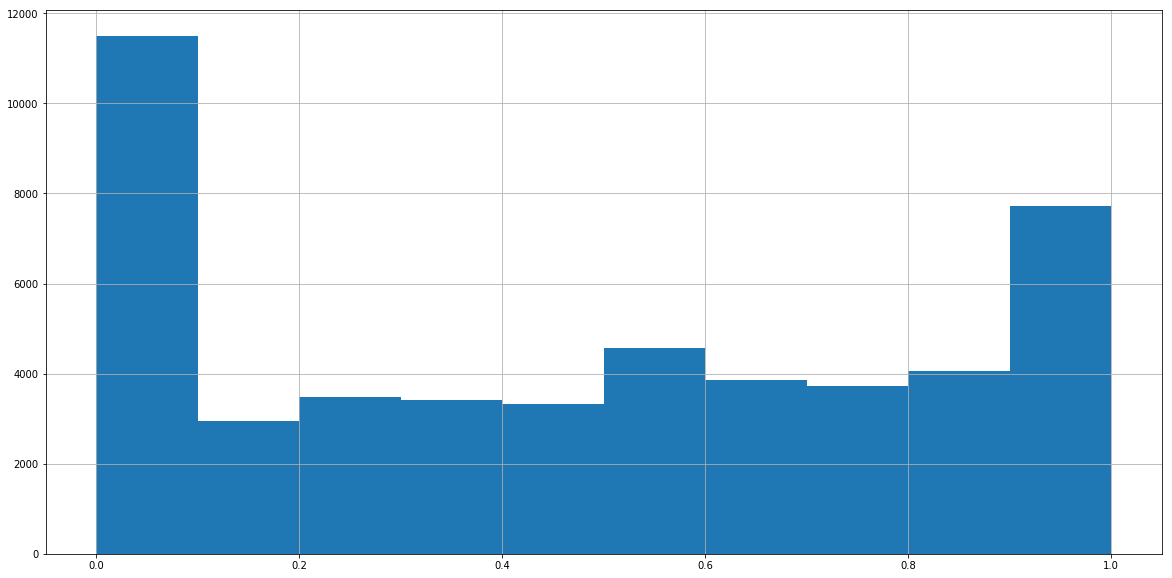

In [43]:
active_users.retweets_precent.hist(figsize=(20, 10))

##Retweeter thresholds
The chosen value is 80% 

In [49]:
# My text classification module. Includes preprocessing and chosen classification model for crawling use.   
from MineDeep.crawler.classification.MLClassifier import Preproccessing  
# A function using a window file selection for dataset path. 

# Data analyzing libraries 
import numpy as np
import matplotlib.pyplot as plt



In [51]:
import nltk

# Load data 
data = pd.read_pickle(choosefile())
data.head()

,text,cls
0,"I posted 5 photos on Facebook in the album ""Ma...",pro
1,"Build the #BDS movement for freedom, justice, ...",pro
2,Tell your friends in the temporary racist enti...,pro
3,"I support Palestinian rights, and I’m fed up w...",pro
4,For the many not the Jew https://t.co/8dp4nwmqIw,against


In [52]:
tknz = TweetTokenizer()
proccessor = Preproccessing()
data.text = proccessor.proccess_data(data.text)
data.head()

,text,cls
0,posted photos facebook album mayor tory use e...,pro
1,build #bds movement freedom justice equality t...,pro
2,tell friends temporary racist entity regime de...,pro
3,support palestinian rights fed anti-jewish con...,pro
4,many not_jew,against


In [55]:
from nltk.tokenize import TweetTokenizer 

pro_data = data.text[data.cls == 'pro']

pro_data_hashtags=[]
for tweet in pro_data:
    hashtags = ' '.join([token for token in proccessor.tknz.tokenize(tweet) if '#' in token])
    pro_data_hashtags.append(hashtags)
pro_data_hashtags = ' '.join(pro_data_hashtags)
pro_hashtags_freq = nltk.FreqDist(proccessor.tknz.tokenize(pro_data_hashtags))

import operator

sorted_pro_data_freq = sorted(pro_hashtags_freq.items(), key=operator.itemgetter(1), reverse=True)
sorted_pro_data_freq.remove(('#tlvinldn', 44))
sorted_pro_data_freq.remove(('#jerusalem', 128))
sorted_pro_data_freq.remove(('#giro101', 41))
sorted_pro_data_freq.remove(('#giro2018', 42))
sorted_pro_data_freq.remove(('#idf', 34))
sorted_pro_data_freq.remove(('#trump', 24))
sorted_pro_data_freq.remove(('#manchester', 19))
sorted_pro_data_freq.remove(('#yldbigevent', 16))
sorted_pro_data_freq.remove(('#jewish', 16))
sorted_pro_data_freq.remove(('#yeg', 15))
sorted_pro_data_freq.remove(('#london', 14))
sorted_pro_data_freq.remove(('#jews', 14))
sorted_pro_data_freq.remove(('#tlvfest', 13))
sorted_pro_data_freq.remove(('#lgbt', 12))
sorted_pro_data_freq.remove(('#decrim', 7))
sorted_pro_data_freq.remove(('#telaviv', 11))
sorted_pro_data_freq.remove(('#watch', 11))
sorted_pro_data_freq.remove(('#solidarity', 15))
sorted_pro_data_freq.remove(('#queer', 11))
sorted_pro_data_freq.remove(('#anc54', 10))
sorted_pro_data_freq.remove(('#us', 10))
sorted_pro_data_freq.remove(('#un', 10))
sorted_pro_data_freq.remove(('#dsei', 8))
sorted_pro_data_freq.remove(('#european', 9))
sorted_pro_data_freq.remove(('#southafrica', 8))
sorted_pro_data_freq.remove(('#video', 8))
sorted_pro_data_freq.remove(('#unga', 9))
sorted_pro_data_freq.remove(('#onpoli', 9))
sorted_pro_data_freq.remove(('#nickcave', 9))
sorted_pro_data_freq.remove(('#ualberta', 9))
sorted_pro_data_freq.remove(('#brighton', 9))
sorted_pro_data_freq.remove(('#elbit', 8))
sorted_pro_data_freq.remove(('#british', 8))

pro_hashtags = [hashtag[0] for hashtag in sorted_pro_data_freq[:70]]
pro_hashtags.append('#IamAhed')
pro_hashtags

['#bds',
 '#palestine',
 '#israel',
 '#palestinian',
 '#freeahedtamimi',
 '#freepalestine',
 '#israeli',
 '#apartheid',
 '#jerusalemisthecapitalofpalestine',
 '#stophp',
 '#gaza',
 '#boycotthp',
 '#hpediscover',
 '#zionist',
 '#handsoffjerusalem',
 '#relocatetherace',
 '#worldwithoutwalls',
 '#icc4israel',
 '#pinkwashing',
 '#genocide',
 '#palestinians',
 '#nowaytotreatachild',
 '#grouppalestine',
 '#stoparmingisrael',
 '#stopdsei',
 '#defundislamophobia',
 '#defundsettlements',
 '#israelgenocide101',
 '#ahedtamimi',
 '#apartheidroundtables',
 '#intifada',
 '#hebron',
 '#israeliapartheidweek',
 '#boycottisrael',
 '#gazanow',
 '#nakba',
 '#handsoffalquds',
 '#boycotttlvpride',
 '#balfour100',
 '#churchdivest',
 '#returnthebirthright',
 '#freetamimiwomen',
 '#freeahed',
 '#zionism',
 '#humanrights',
 '#israelcrimes',
 '#righttoknowact',
 '#canceltelaviv',
 '#boycottapartheidisrael',
 '#nazi',
 '#mb',
 '#noantisemitism',
 '#zionists',
 '#gazaunderattack',
 '#occupation',
 '#deadlyexchange

In [53]:
against_data = data.text[data.cls == 'against']
# Create 2 Dataframe objects of the tweets of each sentiment class 
against_data_hashtags=[]
for tweet in against_data:
    hashtags = ' '.join([token for token in proccessor.tknz.tokenize(tweet) if '#' in token])
    against_data_hashtags.append(hashtags)
against_data_hashtags = ' '.join(against_data_hashtags)
against_hashtags_freq = nltk.FreqDist(proccessor.tknz.tokenize(against_data_hashtags))

import operator

sorted_against_data_freq = sorted(against_hashtags_freq.items(), key=operator.itemgetter(1), reverse=True)
 
against_hashtags = ['#bdsfail', '#jewhatred', '#antisemitism', '#iran', '#standwithisrael', '#jewhater',
                    '#racist', '#proisrael', '#jewhater', '#israelforever', '#fuckpalestine', '#fuckbds',
                    '#israelforever', '#fuckpalestine', '#shabbatshalom', '#israction2017', '#bdsishamas',
                    '#isractionday', '#istandwithisrael', '#stopbds']
against_hashtags

['#bdsfail',
 '#jewhatred',
 '#antisemitism',
 '#iran',
 '#standwithisrael',
 '#jewhater',
 '#racist',
 '#proisrael',
 '#jewhater',
 '#israelforever',
 '#fuckpalestine',
 '#fuckbds',
 '#israelforever',
 '#fuckpalestine',
 '#shabbatshalom',
 '#israction2017',
 '#bdsishamas',
 '#isractionday',
 '#istandwithisrael',
 '#stopbds']